#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Week 5 - Practical Workshop 

Today, we will be using `scikit-learn` again to learn more about Baselines, Decision Trees and Nearest Neighbourhood classifires.
### Exercise 1. 
Load the `IRIS` dataset as follows (Note that there are some small differences between this dataset and the one we were looking at last week, most notably, the errors that we needed to fix are not present):

In [2]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt

iris = datasets.load_iris()

- **(a)** Identify the contents of the complex data type `IRIS` , for example iris.DESCR contains a long description of the dataset, which you can `print()`.

In [4]:
#print(iris)
#print(dir(iris))
print(iris.DESCR)
#print(iris.data.shape)
#print(iris.target.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- **(b)** The common terminology in scikit-learn is that the array defining the attribute values is called X and the array defining the “ground truth” labels is called y ; create these variables for the Iris data.

In [15]:
X = iris.data
y = iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- **(c)** Confirm that X is a 2-dimensional array, with a row for each instance and a column for each attribute. (Hint: read about the `shape` property in numpy .)

In [16]:
print("X.shape {} y.shape {}".format(X.shape, y.shape))
#X包含150个样本，每个样本有4个特征；y包含150个样本的目标标签

X.shape (150, 4) y.shape (150,)


### Exercise 2.
Let’s build a 0-R classifier (“majority class classifier”). In scikit-learn , this is a `DummyClassifier`. 

**Note** `scikit-learn` uses this terminology to help remind you not to use these sorts of classifiers when trying to solve real problems; However they are easy **baseline classifiers** and are quite useful.

In [17]:
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(X, y)

DummyClassifier(strategy='most_frequent')

- **(a)** Confirm that this is a typical 0-R classifier by checking its predictions on the training data: `zero_r.predict(X)` — which class has it chosen?

In [20]:
zr_pred = zero_r.predict(X)
print(zr_pred)

label_counter = Counter(y)
label_counter.most_common()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


[(0, 50), (1, 50), (2, 50)]

Everything is a number, as far as scikit-learn is concerned - so it's a little difficult to know which class label this is. On the other hand, each of the classes is equally likely, so the method appears to have chosen the "0th" class arbitrarily.

- **(b)** The default evaluation metric associated with a `DummyClassifier` is `accuracy`, which you can observe using `score()` , for example: `zero_r.score(X, y)`. This strategy — building a model, and then evaluating on the data that we used to build the model — gives us something called “training accuracy”, and is generally frowned upon in the *Machine Learning* community. Why do you suppose this is? (We’ll examine some better techniques later.)

In [21]:
print(zero_r.score(X, y))

0.3333333333333333


- **(c)** Contrast the `0-R classifier` with the “weighted random classifier”, which makes random predictions according to the distribution of classes in the training data; (`strategy='stratified'`) — check its predictions, and evaluate its training accuracy. Does it have a higher accuracy, on average, than `0-R`, or a `lower accuracy`? (You should run `score()` at least 10 times.)

In [24]:
stratified_clf = DummyClassifier(strategy='stratified')
stratified_clf.fit(X, y)
accuracies = []
num_runs = 10
for i in range(num_runs):
    acc = stratified_clf.score(X, y)
    accuracies.append(acc)
print(accuracies)
print('Average accuracy over {} runs is: {}.'.format(num_runs, np.mean(accuracies)))

[0.3, 0.36, 0.25333333333333335, 0.24, 0.35333333333333333, 0.36, 0.30666666666666664, 0.31333333333333335, 0.32, 0.41333333333333333]
Average accuracy over 10 runs is: 0.32199999999999995.


### Exercise 3.
Let’s consider a couple of other classifiers: a `Decision Tree`, and `1-R` (which is really just a limited
`DecisionTreeClassifier` in `scikit-learn` ).

**NOTE:** `scikit-learn` implementation of `1-R` is slightly different to the lecture version, because it doesn’t count errors — rather it uses the **Gini coefficient** or the **Information Gain** to determine the best attribute.



In [26]:
from sklearn.tree import DecisionTreeClassifier
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X,y)
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=10)

- **(a)** Find the training accuracy of the two classifiers.

In [28]:
one_r_acc = one_r.score(X, y)
dt_acc = dt.score(X, y)
print("1-R accuracy: {}; DT accuracy: {}".format(one_r_acc, dt_acc))

1-R accuracy: 0.6666666666666666; DT accuracy: 1.0


- **(b)** The "`feature_importances_`" attribute is adequate for completely describing the 1-R classifier. Which attribute is being used to classify the data?

In [29]:
# 这行代码获取one_r分类模型中的特征重要性
importances = one_r.feature_importances
# 这行代码找到特征重要性中最大值的索引_
max_index = np.argmax(importances)
best_feature_name = iris.feature_names[max_index]
print(best_feature_name)

petal width (cm)


- **(c)** Check the predicted labels for each instance to discern the values for this attribute that each class maps to.

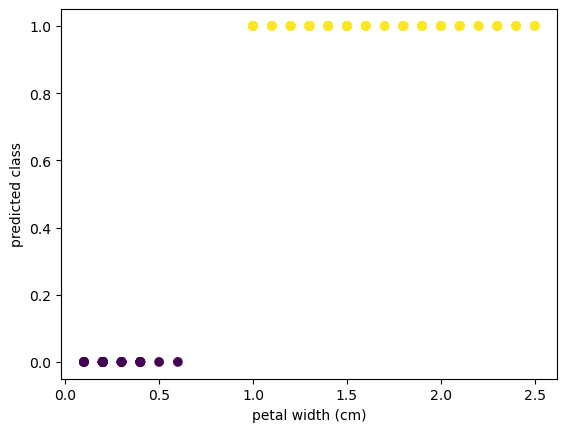

In [30]:
ybar = one_r.predict(X)
# 从特征矩阵X中提取最重要的特征列
best_feature = X[:,max_index]
plt.scatter(best_feature, ybar, c=ybar)
plt.xlabel(best_feature_name)
plt.ylabel('predicted class')
plt.show()
#print(ybar)

- **(d)** The default splitting criterion for these Decision Trees is the **Gini coefficient**. Read up on the difference between this and the **Information Gain** — do you expect the behaviour of this model to change by using the alternative splitting criterion? Try it, and confirm your expectations.

Information Gain/entropy: 1-R accuracy: 0.6666666666666666 DT Gini accuracy: 1.0 DT IG accuracy: 1.0
1-R attribute:  petal length (cm)
DT Gini attribute:  petal width (cm)
DT IG attribute:  petal width (cm)


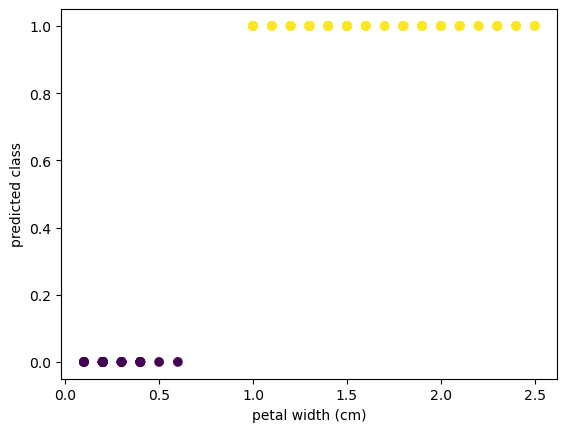

In [31]:
one_r = DecisionTreeClassifier(max_depth=1, criterion="entropy")
one_r.fit(X, y)
dt_gini = DecisionTreeClassifier(max_depth=None) #, criterion="entropy")
dt_gini.fit(X, y)
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy")
dt_IG.fit(X, y)

one_r_acc = one_r.score(X, y)
dt_gini_acc = dt_gini.score(X, y)
dt_IG_acc = dt_IG.score(X, y)
print("Information Gain/entropy: 1-R accuracy: {} DT Gini accuracy: {} DT IG accuracy: {}".format(one_r_acc, dt_gini_acc, dt_IG_acc))

importances = one_r.feature_importances_
max_index_r = np.argmax(importances)
best_feature_name_r = iris.feature_names[max_index_r]
print("1-R attribute: ",best_feature_name_r)

importances = dt_gini.feature_importances_
max_index_dt_gini = np.argmax(importances)
best_feature_name_dt_gini = iris.feature_names[max_index_dt_gini]
print("DT Gini attribute: ",best_feature_name_dt_gini)

importances = dt_IG.feature_importances_
max_index_dt_IG = np.argmax(importances)
best_feature_name_dt_IG = iris.feature_names[max_index_dt_IG]
print("DT IG attribute: ",best_feature_name_dt_IG)

ybar = one_r.predict(X)
best_feature = X[:, max_index]
plt.scatter(best_feature, ybar, c=ybar)
plt.xlabel(best_feature_name)
plt.ylabel('predicted class')
plt.show()

Recall that entropy is  𝐻(𝑋)=−∑𝑝(𝑥)log𝑝(𝑥)
 ; Gini is defined similarly:  𝐺(𝑋)=1−∑𝑝(𝑥)×𝑝(𝑥)
 

As we might expect from the similar formulae, whether we use the Gini coefficient or Information Gain makes little difference in this case: 1-R still chooses petal-width, and the Decision Tree still reproduces the training data exactly.



## Exercise 4.

Read up on the implelentation of the KNN classifier in `sklearn.neighbors.KNeighborsClassifier` and the implementation of distance functions in `sklearn.metrics`. Implement the KNN classifier 
- with Manhattan distance 
- inverse distance weighting
- K= 1 and 5


In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ... (Your dataset loading for X and y) 

# Manhattan Distance with KNN
knn_manhattan_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_manhattan_5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Inverse Distance Weighted KNN (using sklearn's functionality)
knn_distweight_1 = KNeighborsClassifier(n_neighbors=1, weights='distance') 
knn_distweight_5 = KNeighborsClassifier(n_neighbors=5, weights='distance') 

# Fit the models
knn_manhattan_1.fit(X, y)
knn_manhattan_5.fit(X, y)
knn_distweight_1.fit(X, y)
knn_distweight_5.fit(X, y)

# Predictions
pred_manhattan_1 = knn_manhattan_1.predict(X)
pred_manhattan_5 = knn_manhattan_5.predict(X)
pred_distweight_1 = knn_distweight_1.predict(X)
pred_distweight_5 = knn_distweight_5.predict(X)

# Accuracy
print("1-NN Manhattan accuracy:", accuracy_score(y, pred_manhattan_1))
print("5-NN Manhattan accuracy:", accuracy_score(y, pred_manhattan_5))
print("1-NN Distance Weighted accuracy:", accuracy_score(y, pred_distweight_1))
print("5-NN Distance Weighted accuracy:", accuracy_score(y, pred_distweight_5))

1-NN Manhattan accuracy: 1.0
5-NN Manhattan accuracy: 0.9666666666666667
1-NN Distance Weighted accuracy: 1.0
5-NN Distance Weighted accuracy: 1.0


### Exercise 5
A better mechanism for evaluating a classifier is based on randomly partitioning the data into a
training set and test set (the “holdout” method). There is an in-built utility for this in scikit-learn ,
but it can be in one of two places:

In [33]:
from sklearn.model_selection import train_test_split # Newer versions
#from sklearn.cross_validation import train_test_split # Older versions
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (112, 4) X_test: (38, 4) y_train: (112,) y_test: (38,)


- **(a)** Train the five classifiers (`0-R, 1-R, Decision Tree, 1NN and 5NN`) on the training data, rather than the full data set. score() is too specific to be used in most situations; another way to find the training accuracy is by comparing the predictions to the ground truth labels as follows:

```python
>>> from scikit-learn.metrics import accuracy_score
>>> accuracy_score(zero_R.predict(X_train),y_train))
```

- Calculate the accuracy of the classifiers on the held-out training data. How does it compare to the training accuracies you calculated before? Why is this?

In [34]:
from sklearn.metrics import accuracy_score

zero_r.fit(X_train, y_train)
one_r.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

zr_acc = accuracy_score(zero_r.predict(X_train),y_train)
or_acc = accuracy_score(one_r.predict(X_train),y_train)
dt_acc = accuracy_score(dt.predict(X_train),y_train)
knn1_acc = accuracy_score(knn1.predict(X_train),y_train)
knn5_acc = accuracy_score(knn5.predict(X_train),y_train)

print('Train accuracies: \n 0-R: {}\n 1-R: {}\n DT: {}\n 1NN: {}\n 5NN: {}'.format(...))

NameError: name 'knn1' is not defined

- **(b)** Instead of calculating the accuracy with respect to the training set, train your classifiers on the training data (using `fit()`) and then evaluate them (by calculating accuracy) according to their predictions on the test data. How different are the training accuracies and test accuracies? Hypothesise what could be causing these differences.

In [ ]:
zr_acc = accuracy_score(zero_r.predict(X_test),y_test)
or_acc = accuracy_score(one_r.predict(X_test),y_test)
dt_acc = accuracy_score(dt.predict(X_test),y_test)
knn1_acc = accuracy_score(knn1.predict(X_test),y_test)
knn5_acc = accuracy_score(knn5.predict(X_test),y_test)

print('Test accuracies:\n 0-R: {}\n 1-R: {}\n DT: {}\n 1NN: {}\n 5NN: {}'.format(zr_acc, or_acc, dt_acc, knn1_acc, knn5_acc))

- **(c)** By default, `train_test_split` uses 75% of the data as training, and 25% as test. This can be changed by passing an argument, for example, `test_size=0.5` means that we use 50% as training and 50% as test. Try some different values (perhaps multiple times) to see if you can observe the trade-off inherent in the model using this evaluation strategy.

- **Note** The default behaviour of `train_test_split` is that the remainder of the data is used as training; this too can be altered, if you wish.

In [ ]:
for test_size in [...]:
    print('Running experiments with test set size: {}'.format(test_size))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    zero_r.fit(X_train, y_train)
    one_r.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    knn1.fit(X_train, y_train)
    knn5.fit(X_train, y_train)

    zr_acc = accuracy_score(zero_r.predict(X_train),y_train)
    or_acc = accuracy_score(one_r.predict(X_train),y_train)
    dt_acc = accuracy_score(dt.predict(X_train),y_train)
    knn1_acc = accuracy_score(knn1.predict(X_train),y_train)
    knn5_acc = accuracy_score(knn5.predict(X_train),y_train)
    
    print('Train accuracies:\t 0-R: {}\t 1-R: {}\t DT: {}\t 1NN: {}\t 5NN: {}'.format(zr_acc, or_acc, dt_acc, knn1_acc, knn5_acc))

    zr_acc = accuracy_score(zero_r.predict(X_test),y_test)
    or_acc = accuracy_score(one_r.predict(X_test),y_test)
    dt_acc = accuracy_score(dt.predict(X_test),y_test)
    print('Test accuracies:\t 0-R: {}\t 1-R: {} \tDT: {}\t 1NN: {}\t 5NN: {}'.format(zr_acc, or_acc, dt_acc, knn1_acc, knn5_acc))
    print()

### Exercise 6. [OPTIONAL]
*(Stratified)* `M–fold` cross-validation is so popular, `scikit-learn` has a utility that applies it directly.
For example, 10–fold cross-validation of the `0-R` classifier proceeds as follows:

```python
>>> from sklearn.model_validation import cross_val_score # Newer versions
>>> cross_val_score(zero_R, X, y, cv=10)
```
**Note:** There are also simpler methods like `StratifiedKFold()` to generate the partitions, which you can then use to train and test the model yourself, if you wish.

- **(a)** This method returns an array of the calculated evaluation metric (by default, accuracy) across the folds. Write a wrapper function which averages these values, so as to come up with a single score for the classifier.

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(zero_r, X, y, cv=10))

def avg_score(clf, X, y, cv=10):
    scores = cross_val_score(...)
    return ...

- **(b)** How does the estimate of the accuracy of the various classifiers using cross-validation compare to the training accuracies and holdout accuracies you calculated above?

In [ ]:
for clf in [zero_r, one_r, dt, knn1, knn5]:
    avg = avg_score(clf, X, y, cv=10)
    print(clf)
    print('Average CV accuracy', avg)
    print()